In [157]:
import pandas as pd
import random
import nltk
import re
import matplotlib.pyplot as plt

In [225]:
df = pd.read_csv("movies_metadata.csv")

C:\Users\dimit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [226]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

### Randomly choose a subset

In [228]:
number_of_movies = 4000
# Set seed in an integer value, so every time you get the same random combination.
a = random.Random(500)
ind = a.sample(range(0, df.shape[0]), number_of_movies)
df = df.iloc[ind,:]

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 30251 to 23080
Data columns (total 24 columns):
adult                    4000 non-null object
belongs_to_collection    345 non-null object
budget                   4000 non-null object
genres                   4000 non-null object
homepage                 713 non-null object
id                       4000 non-null object
imdb_id                  3998 non-null object
original_language        4000 non-null object
original_title           4000 non-null object
overview                 3923 non-null object
popularity               3999 non-null object
poster_path              3963 non-null object
production_companies     4000 non-null object
production_countries     4000 non-null object
release_date             3989 non-null object
revenue                  3999 non-null float64
runtime                  3978 non-null float64
spoken_languages         3999 non-null object
status                   3994 non-null object
tagline       

### Stopwords, stemming, and tokenizing

In this section, we define some function in order to manipulate the overview.

In [230]:
import nltk
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [231]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [232]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
import string
from nltk.corpus import stopwords 
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer 

stemmer = SnowballStemmer("english")

In [233]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def Text_Processing(text):
    #lower case
    text=text.lower()
    #remove punctuation
    text = text.translate(str.maketrans('','',string.punctuation))
    text = text.translate(str.maketrans('','','1234567890'))
    text = re.sub("[^a-zA-Z]+", " ", text)
    #tokenisation
    tokens = nltk.word_tokenize(text)
    #stop words
    stop_list = set(stopwords.words('english')) 
    filtered_tokens=[word for word in tokens if word not in stop_list]
    #lemmatisation
    wnl = WordNetLemmatizer()
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN    
    def lemmatize_with_pos(token):
        pos = nltk.pos_tag(token)
        lemm_words = [wnl.lemmatize(sw[0], get_wordnet_pos(sw[1])) for sw in pos]
        return lemm_words
    final_token=lemmatize_with_pos(filtered_tokens)
    return final_token
    #return " ".join(text)

In [234]:
print(df["overview"])

30251    A yellow cab is driving through the vibrant an...
34519    Deborah quickly cultivates a rabid legion of S...
37899    A multi-dimensional interface between a comic ...
30705    Two brothers, both cadets at Annapolis, fall i...
16753    Filmmaker Martin Scorsese interviews his mothe...
41648    Freshman Neil's Vanguard stories are all he ca...
24639    The French computer programmer Laura inherits ...
13948    A married couple with a rocky past adopt 9-yea...
7078     Where Angels Go, Trouble Follows (1968) is a m...
22238    At a party, someone goes insane and murders th...
37411    In All Stars 2 Old Stars, the unexpected weddi...
5985     "He wrote me..." A woman narrates the thoughts...
1186     In the city of New York, comedian Alvy Singer ...
13273    Humans... the other white meat... Unless you'r...
21650    Edna's father wants her to marry wealthy Count...
15194    A comedy about two listless brothers who fall ...
26095    Paul Watkins (Michael Paré) is an American pil.

In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df = 0.95,min_df = 0.02,analyzer = "word",
                                   tokenizer = Text_Processing,
                                   stop_words = "english")
                                   
% time tfidf_matrix = tfidf_vectorizer.fit_transform(df["overview"].values.astype('U'))
print(tfidf_matrix.shape)

Wall time: 16.5 s
(4000, 150)


In [236]:

print(tfidf_vectorizer.get_feature_names())

['age', 'agent', 'american', 'attempt', 'away', 'base', 'battle', 'beautiful', 'begin', 'best', 'big', 'boy', 'break', 'bring', 'brother', 'change', 'child', 'city', 'come', 'comedy', 'country', 'couple', 'daughter', 'day', 'dead', 'deal', 'death', 'decide', 'decides', 'die', 'director', 'discover', 'discovers', 'documentary', 'dream', 'drug', 'end', 'escape', 'event', 'face', 'fall', 'family', 'father', 'fight', 'film', 'follow', 'force', 'friend', 'gang', 'girl', 'girlfriend', 'good', 'great', 'group', 'head', 'help', 'high', 'home', 'house', 'husband', 'include', 'involve', 'job', 'join', 'journey', 'kill', 'killer', 'know', 'later', 'lead', 'learn', 'leave', 'life', 'like', 'little', 'live', 'local', 'long', 'look', 'lose', 'love', 'make', 'man', 'marry', 'meet', 'men', 'money', 'mother', 'movie', 'murder', 'mysterious', 'new', 'night', 'old', 'order', 'parent', 'past', 'people', 'place', 'plan', 'play', 'police', 'power', 'real', 'relationship', 'release', 'return', 'run', 'save',

In [237]:
terms = tfidf_vectorizer.get_feature_names()
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

### Dimensionality Reduction (t-SNE)

In [238]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components = 50,random_state =2)
principalComponents = pca.fit_transform(tfidf_matrix.toarray())
print(data50D.shape)

% time X_m = TSNE(n_components=2, random_state = 2).fit_transform(principalComponents)
X_m.shape

(1000, 50)
Wall time: 2min 58s


(4000, 2)

### K-means clustering

In [239]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

num_clusters = 6
km = MiniBatchKMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [240]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = tfidf_vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :15]:
        #print(voc[cluster_center[ind]], end=',')
        print(' %s' % terms[ind], end=',')
    print("\n")


Cluster 0 words: woman, new, world, force, kill, girl, try, young, war, make, attempt, city, turn, time, year,

Cluster 1 words: life, man, story, school, high, day, old, tell, year, student, friend, world, way, new, set,

Cluster 2 words: family, father, daughter, young, mother, child, work, discovers, relationship, start, live, town, turn, home, life,

Cluster 3 words: country, gang, brother, murder, set, try, death, friend, plan, mysterious, fight, night, sister, town, girl,

Cluster 4 words: love, fall, know, make, man, young, die, life, story, live, thing, wife, win, come, girl,

Cluster 5 words: film, director, base, life, documentary, star, boy, story, make, death, comedy, man, time, tell, include,



In [241]:
X = X_m

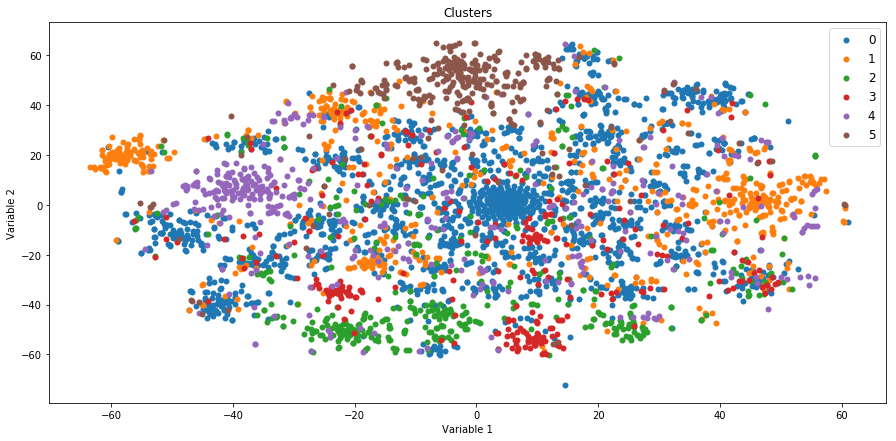

In [245]:
df_cluster = pd.DataFrame({'X': X[:,0], 'Y': X[:,1], 'Cluster': clusters})

fig, ax = plt.subplots(figsize = (15,7))


for i in np.unique(clusters):
    inter = df_cluster[df_cluster['Cluster']==i]
    _ = ax.scatter(inter['X'], inter['Y'], label=i,lw=0)

ax.set_title("Clusters")
ax.set_xlabel("Variable 1")
ax.set_ylabel("Variable 2")
ax.legend(fontsize = 12)


plt.show()

## Create a final dataset with movies and clusters

In [246]:
df_final = df[["original_title", "overview", "genres", "vote_average"]].copy()
df_final["Cluster"] = clusters



df_final.to_csv('movies_clusters.csv')
df_final.head()

,original_title,overview,genres,vote_average,Cluster
30251,تاکسی,A yellow cab is driving through the vibrant an...,"[{'id': 99, 'name': 'Documentary'}, {'id': 18,...",6.8,5
34519,All About Evil,Deborah quickly cultivates a rabid legion of S...,"[{'id': 27, 'name': 'Horror'}]",5.6,1
37899,Zoom,A multi-dimensional interface between a comic ...,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",5.7,5
30705,An Annapolis Story,"Two brothers, both cadets at Annapolis, fall i...","[{'id': 18, 'name': 'Drama'}]",0.0,4
16753,Italianamerican,Filmmaker Martin Scorsese interviews his mothe...,"[{'id': 99, 'name': 'Documentary'}]",6.6,2


In [247]:
df_final["Cluster"].value_counts()

0    1895
1     636
2     443
4     411
5     323
3     292
Name: Cluster, dtype: int64